# DAT210x - Programming with Python for DS

## Module6- Lab1

In this lab, you'll get started with support vector classifier by revisiting UCI's wheat-seeds dataset. First, you will benchmark how long it takes to train and predict with SVC relative to how long K-Neighbors took to train and test, and then you'll compare the decision boundary plot produced by the two.

Start by reviewing the starter code located in Module6/Module6 - Lab1.ipynb and of course the wheat dataset in Module6/Datasets/wheat.data. Be sure to read through everything, so that you know exactly what is being asked of you...
Add in the KNN and SVC classifiers
Load up your dataset properly and prune it
Run the convenience benchmark and plotting functions
Then, answer the following questions.

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import time

import warnings
warnings.filterwarnings('ignore')

Feel free to adjust and experiment with these parameters after you have completed the lab:

In [4]:
C = 1
kernel = 'linear'

In [69]:
# TODO: Change to 200000 once you get to Question#2
# iterations = 5000
iterations = 200000

# You can set this to false if you want to draw the full square matrix:
FAST_DRAW = True

### Convenience Functions

In [64]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure(figsize=(15,10))
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [65]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        model.fit(X_train, y_train)
        
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:
        score = model.score(X_test, y_test)
        
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))

### The Assignment

Load up the wheat dataset into dataframe `X` and verify you did it properly. Indices shouldn't be doubled, nor should you have any headers with weird characters...

In [40]:
# .. your code here ..
X = pd.read_csv(r'Datasets/wheat.data', index_col=0)
# print(len(X))
print(len(X.drop_duplicates())) #210
X.head(3)

210


,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama


In [41]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


Go ahead and drop any row with a nan:

In [42]:
X = X.dropna(axis=0)
print(len(X))

203


In the future, you might try setting the nan values to the mean value of that column, the mean should only be calculated for the specific class rather than across all classes, now that you have the labels.

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we showed you in Module 5, such that `canadian:0`, `kama:1`, and `rosa:2`.

In [43]:
y = X['wheat_type']
X = X.drop(columns=['wheat_type'])

In [47]:
y = y.map({'canadian':0, 'kama':1, 'rosa':2})

Split your data into a `test` and `train` set. Your `test` size should be 30% with `random_state` 7. Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

Create an SVC classifier named `svc` and use a linear kernel. You already have `C` defined at the top of the lab, so just set `C=C`.

In [51]:
from sklearn.svm import SVC
svc = SVC(C=C, kernel='linear')

Create an KNeighbors classifier named `knn` and set the neighbor count to `5`:

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

### Fire it Up:

KNeighbors Results
200000 Iterations Training Time:  67.07559847831726
200000 Iterations Scoring Time:  144.87833786010742
High-Dimensionality Score:  83.607
Max 2D Score:  90.164


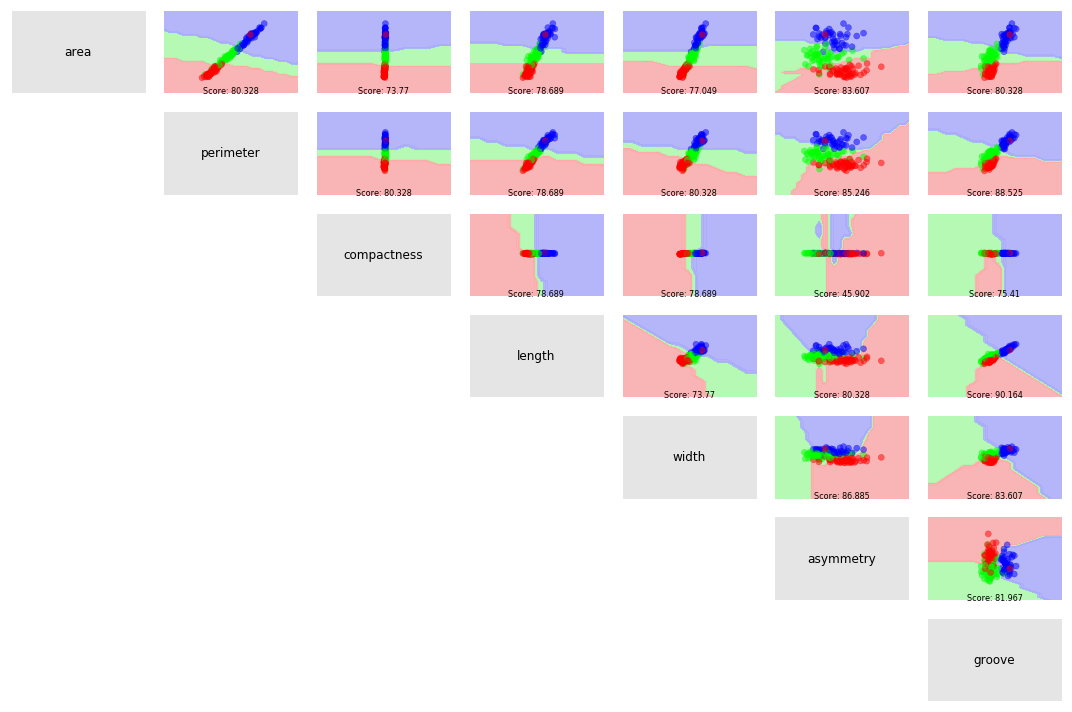

In [70]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

SVC Results
200000 Iterations Training Time:  132.53586506843567
200000 Iterations Scoring Time:  52.878875732421875
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


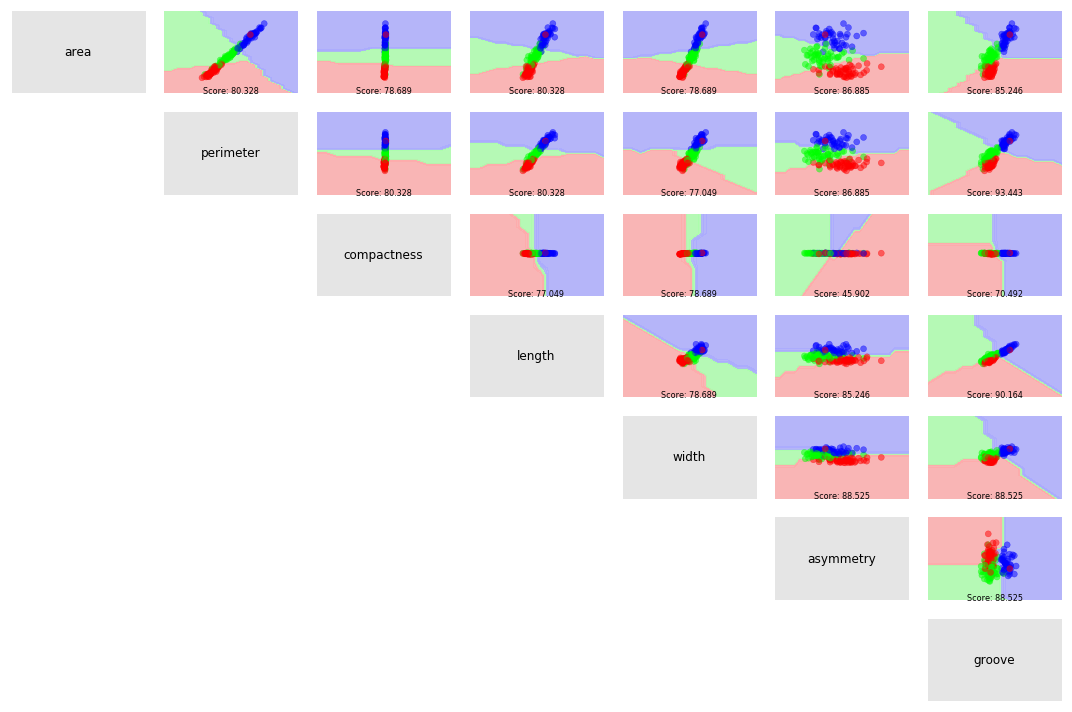

In [71]:
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')

In [72]:
plt.show()

### Bonus:

After submitting your answers, mess around with the gamma, kernel, and C values.